In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
# Visualization
import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import math

# https://medium.com/grabngoinfo/recommendation-system-user-based-collaborative-filtering-a2e76e3e15c4

In [2]:
# ratings = pd.read_csv('ratings-1M.csv')
# movies = pd.read_csv('movies-1M.csv')

movies = pd.read_csv('../datasets/ml-latest-small/movies.csv')
ratings = pd.read_csv('../datasets/ml-latest-small/ratings.csv')

In [3]:
ratings.shape

(100836, 4)

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 610 unique users
The ratings dataset has 9724 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [7]:
df = pd.merge(ratings, movies, on='movieId', how='inner')

df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
y = df['rating']

y.head()

0    4.0
1    4.0
2    4.5
3    2.5
4    4.5
Name: rating, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42, stratify=df.userId)

In [10]:
# Number of users
print('The ratings dataset has', X_train['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', X_train['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', X_train['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(X_train['rating'].unique()))

The ratings dataset has 610 unique users
The ratings dataset has 8932 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [11]:
# Number of users
print('The ratings dataset has', X_test['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', X_test['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', X_test['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(X_test['rating'].unique()))

The ratings dataset has 610 unique users
The ratings dataset has 5093 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [12]:
# Aggregate by movie
agg_ratings = X_train.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 194 to 8833
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              78 non-null     object 
 1   mean_rating        78 non-null     float64
 2   number_of_ratings  78 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
agg_ratings.head()

,title,mean_rating,number_of_ratings
0,'71 (2014),4.0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1
2,'Round Midnight (1986),3.5,1
3,'Salem's Lot (2004),5.0,1
4,'Til There Was You (1997),5.0,1


In [14]:
# Check popular movies
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
6968,"Shawshank Redemption, The (1994)",4.388462,260
2913,Forrest Gump (1994),4.177165,254
6303,Pulp Fiction (1994),4.199170,241
7045,"Silence of the Lambs, The (1991)",4.114537,227
5052,"Matrix, The (1999)",4.171171,222


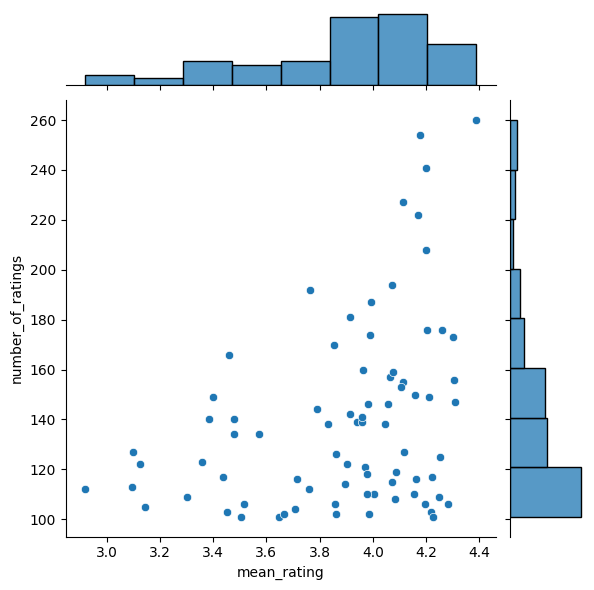

In [15]:
sns.jointplot(x = 'mean_rating', y = 'number_of_ratings', data = agg_ratings_GT100)

In [16]:
df_GT100 = pd.merge(X_train, agg_ratings_GT100[['title']], on='title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10923 entries, 0 to 10922
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10923 non-null  int64  
 1   movieId    10923 non-null  int64  
 2   rating     10923 non-null  float64
 3   timestamp  10923 non-null  int64  
 4   title      10923 non-null  object 
 5   genres     10923 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 597.4+ KB


In [17]:
# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 586 unique users
The ratings dataset has 78 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


# User-Movie Matrix

In [18]:
matrix = df_GT100.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),American Beauty (1999),American History X (1998),Apollo 13 (1995),Babe (1995),Back to the Future (1985),Batman (1989),...,Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,5.0,5.0,NaN,NaN,NaN,4.0,...,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,3.0,...,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,4.0,NaN


In [19]:
matrix.iloc[0]

title
Ace Ventura: Pet Detective (1994)            NaN
Aladdin (1992)                               NaN
Alien (1979)                                 4.0
Aliens (1986)                                NaN
American Beauty (1999)                       5.0
                                            ... 
Toy Story (1995)                             4.0
True Lies (1994)                             NaN
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    NaN
Usual Suspects, The (1995)                   5.0
X-Men (2000)                                 5.0
Name: 1, Length: 78, dtype: float64

In [20]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),American Beauty (1999),American History X (1998),Apollo 13 (1995),Babe (1995),Back to the Future (1985),Batman (1989),...,Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-0.5,NaN,0.50000,0.5,NaN,NaN,NaN,-0.500000,...,0.50000,0.5,NaN,NaN,NaN,-0.5,NaN,NaN,0.500000,0.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.52381,NaN,NaN,1.52381,NaN,NaN,NaN,NaN,NaN,...,1.52381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.733333,NaN,NaN,NaN,NaN,NaN,-0.733333,0.266667,NaN,-0.733333,...,NaN,NaN,-1.733333,-0.733333,NaN,NaN,NaN,NaN,0.266667,NaN


# Identify Similar User

In [21]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000e+00,NaN,NaN,0.267241,-4.532467e-17,-0.797724,-0.101885,0.716041,NaN,-0.359211,...,0.000000,0.156174,0.188191,NaN,0.898027,0.664363,0.059235,0.486516,-0.408248,0.281801
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,0.688247,NaN,-0.188982,NaN,0.970725
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.672414e-01,NaN,NaN,1.000000,-1.000000e+00,0.675012,0.897666,-0.500000,NaN,0.277350,...,-0.842701,0.292770,0.317775,NaN,NaN,-0.062405,-0.098394,-0.576878,NaN,0.051555
5,-4.532467e-17,NaN,NaN,-1.000000,1.000000e+00,0.119523,0.218750,0.645497,NaN,NaN,...,NaN,0.574979,0.387298,0.084921,-0.315063,0.679366,0.319077,0.515825,0.919145,-0.043315


In [22]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.01506188,  0.        , ...,  0.30968957,
        -0.0379049 ,  0.12128243],
       [ 0.01506188,  1.        ,  0.        , ..., -0.02398966,
        -0.23179316,  0.23535019],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30968957, -0.02398966,  0.        , ...,  1.        ,
         0.22396305,  0.11525925],
       [-0.0379049 , -0.23179316,  0.        , ...,  0.22396305,
         1.        , -0.14206098],
       [ 0.12128243,  0.23535019,  0.        , ...,  0.11525925,
        -0.14206098,  1.        ]])

In [23]:
user_similarity_cosine[0]

array([ 1.00000000e+00,  1.50618808e-02,  0.00000000e+00,  1.59503096e-01,
        9.41311034e-19, -2.07382692e-01, -3.95091680e-02,  2.38248197e-01,
        3.79049022e-02, -6.01600000e-02, -6.29566158e-02,  9.28476691e-02,
        1.26530045e-01,  5.02560863e-02,  7.08840671e-02,  9.03749937e-02,
       -9.53454528e-02,  3.52426125e-01,  3.54617857e-01, -6.34022712e-02,
       -4.88466987e-02, -3.03915337e-02, -6.02868708e-02, -9.26873380e-02,
       -7.73730576e-02,  7.22818124e-03,  6.56532164e-02,  3.50890635e-02,
       -1.06328841e-02,  8.35107243e-02, -6.81549714e-02,  2.12745726e-01,
       -3.54957314e-02,  5.05149669e-02, -5.36056267e-02,  0.00000000e+00,
        9.60207735e-02,  2.86534128e-02,  5.25225731e-02, -3.45270651e-02,
       -5.67168466e-02,  5.44931820e-02, -2.12373371e-01,  3.35624311e-01,
        5.28792053e-01, -4.41203733e-02,  3.41184499e-01, -8.65808979e-03,
        1.37018051e-01,  6.09489974e-02, -1.76074426e-01, -3.56546459e-02,
       -3.28266082e-02,  

In [24]:
# Pick a user ID
picked_userid = 10
# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000e+00,NaN,NaN,0.267241,-4.532467e-17,-0.797724,-0.101885,0.716041,NaN,-0.359211,...,0.000000,0.156174,0.188191,NaN,0.898027,0.664363,0.059235,0.486516,-0.408248,0.281801
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,0.688247,NaN,-0.188982,NaN,0.970725
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.672414e-01,NaN,NaN,1.000000,-1.000000e+00,0.675012,0.897666,-0.500000,NaN,0.277350,...,-0.842701,0.292770,0.317775,NaN,NaN,-0.062405,-0.098394,-0.576878,NaN,0.051555
5,-4.532467e-17,NaN,NaN,-1.000000,1.000000e+00,0.119523,0.218750,0.645497,NaN,NaN,...,NaN,0.574979,0.387298,0.084921,-0.315063,0.679366,0.319077,0.515825,0.919145,-0.043315


In [35]:
# Number of similar users
n = 69
# User similarity threashold
user_similarity_threshold = 0.3
# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 10 are userId
312    1.000000
259    1.000000
452    1.000000
162    1.000000
447    1.000000
         ...   
590    0.695664
417    0.640846
144    0.639358
174    0.628619
552    0.628619
Name: 10, Length: 69, dtype: float64


# Delete Movies that user has watched

In [36]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,Aladdin (1992),American Beauty (1999),"Dark Knight, The (2008)",Forrest Gump (1994),Gladiator (2000),"Incredibles, The (2004)","Lord of the Rings: The Fellowship of the Ring, The (2001)","Lord of the Rings: The Return of the King, The (2003)","Lord of the Rings: The Two Towers, The (2002)",Pulp Fiction (1994),Shrek (2001)
userId,,,,,,,,,,,
10,0.636364,-2.363636,1.136364,0.136364,0.636364,-0.863636,0.636364,0.636364,0.636364,-2.363636,1.136364


In [37]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),American Beauty (1999),American History X (1998),Apollo 13 (1995),Babe (1995),Back to the Future (1985),Batman (1989),...,Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
6,-1.071429,0.928571,NaN,NaN,NaN,NaN,-0.071429,-0.071429,NaN,NaN,...,NaN,NaN,0.928571,-1.071429,NaN,NaN,-0.071429,-0.071429,NaN,NaN
14,-1.285714,NaN,NaN,NaN,NaN,NaN,0.714286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.150000,NaN,...,NaN,NaN,-0.150000,NaN,NaN,NaN,NaN,NaN,-0.65,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.178571,-2.821429,NaN,NaN,NaN,NaN,1.678571
43,-0.333333,0.666667,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,0.666667,NaN,0.666667,-1.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN
574,0.727273,0.727273,NaN,NaN,NaN,NaN,-0.272727,NaN,NaN,-1.272727,...,NaN,NaN,-0.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
# Take a look at the data
similar_user_movies

title,Ace Ventura: Pet Detective (1994),Alien (1979),Aliens (1986),American History X (1998),Apollo 13 (1995),Babe (1995),Back to the Future (1985),Batman (1989),Batman Forever (1995),Beauty and the Beast (1991),...,Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
6,-1.071429,NaN,NaN,NaN,-0.071429,-0.071429,NaN,NaN,-1.071429,0.928571,...,NaN,NaN,0.928571,-1.071429,NaN,NaN,-0.071429,-0.071429,NaN,NaN
14,-1.285714,NaN,NaN,NaN,0.714286,NaN,NaN,NaN,-1.285714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,-0.150000,NaN,NaN,NaN,...,NaN,NaN,-0.150000,NaN,NaN,NaN,NaN,NaN,-0.65,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.178571,-2.821429,NaN,NaN,NaN,NaN,1.678571
43,-0.333333,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,0.666667,0.666667,...,NaN,NaN,NaN,0.666667,NaN,0.666667,-1.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN
574,0.727273,NaN,NaN,NaN,-0.272727,NaN,NaN,-1.272727,-1.272727,NaN,...,NaN,NaN,-0.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Recommend Items

In [39]:
# A dictionary to store item scores
item_score = {}
# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count
# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)
# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
21,"Godfather: Part II, The (1974)",0.532819
45,"Princess Bride, The (1987)",0.483263
51,"Shawshank Redemption, The (1994)",0.465658
40,Monty Python and the Holy Grail (1975),0.454938
17,Fight Club (1999),0.386826
46,Raiders of the Lost Ark (Indiana Jones and the...,0.385087
31,"Lion King, The (1994)",0.363036
56,Star Wars: Episode IV - A New Hope (1977),0.362860
39,"Monsters, Inc. (2001)",0.313835
10,Braveheart (1995),0.311976


# Predict Ratings

In [40]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]
# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 10 is 3.36


In [41]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating
# Take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
21,"Godfather: Part II, The (1974)",0.532819,3.896456
45,"Princess Bride, The (1987)",0.483263,3.846899
51,"Shawshank Redemption, The (1994)",0.465658,3.829294
40,Monty Python and the Holy Grail (1975),0.454938,3.818575
17,Fight Club (1999),0.386826,3.750462
46,Raiders of the Lost Ark (Indiana Jones and the...,0.385087,3.748724
31,"Lion King, The (1994)",0.363036,3.726672
56,Star Wars: Episode IV - A New Hope (1977),0.362860,3.726496
39,"Monsters, Inc. (2001)",0.313835,3.677471
10,Braveheart (1995),0.311976,3.675612


In [42]:
def scale_ratings(predicted_ratings, min_rating=0, max_rating=5):
    min_predicted_rating = min(predicted_ratings)
    max_predicted_rating = max(predicted_ratings)
    scaled_ratings = []
    for rating in predicted_ratings:
        scaled_rating = (rating - min_predicted_rating) * (max_rating - min_rating) / (max_predicted_rating - min_predicted_rating) + min_rating
        scaled_rating = round(scaled_rating / 0.5)*0.5
        scaled_ratings.append(scaled_rating)
    return scaled_ratings

ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating
scaled_ratings = scale_ratings(ranked_item_score['predicted_rating'].tolist())
ranked_item_score['scaled_rating'] = scaled_ratings

In [43]:
# def min_max_normalize(column):
#     return (column - 0) / (5 - 0)

# ranked_item_score['scaled_predicted'] = ranked_item_score['predicted_rating'].apply(min_max_normalize)
# # ranked_item_score['scaled_predicted'] = ranked_item_score['predicted_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))


In [44]:
ranked_item_score

,movie,movie_score,predicted_rating,scaled_rating
21,"Godfather: Part II, The (1974)",0.532819,3.896456,5.0
45,"Princess Bride, The (1987)",0.483263,3.846899,5.0
51,"Shawshank Redemption, The (1994)",0.465658,3.829294,5.0
40,Monty Python and the Holy Grail (1975),0.454938,3.818575,4.5
17,Fight Club (1999),0.386826,3.750462,4.5
...,...,...,...,...
59,Stargate (1994),-0.581980,2.781656,1.0
8,Batman Forever (1995),-0.623301,2.740335,1.0
33,"Mask, The (1994)",-0.662948,2.700688,0.5
0,Ace Ventura: Pet Detective (1994),-0.737410,2.626227,0.5


In [45]:
# X_train[(X_train.userId == 1) & (X_train.title == "Incredibles, The (2004)")]
# X_train[X_train.title == "Incredibles, The (2004)"]
# X_test[X_test.title == "Incredibles, The (2004)"]
# X_test[(X_test.userId == 1) & (X_test.title == "Incredibles, The (2004)")]

In [46]:
X_train[X_train.userId == picked_userid]

,userId,movieId,rating,timestamp,title,genres
41055,10,6155,3.0,1455357557,How to Lose a Guy in 10 Days (2003),Comedy|Romance
22084,10,1907,4.0,1455306183,Mulan (1998),Adventure|Animation|Children|Comedy|Drama|Musi...
42746,10,77841,2.0,1455302684,St Trinian's 2: The Legend of Fritton's Gold (...,Adventure|Comedy
42955,10,88163,4.0,1455357504,"Crazy, Stupid, Love. (2011)",Comedy|Drama|Romance
42986,10,88810,3.0,1455399281,"Help, The (2011)",Drama
...,...,...,...,...,...,...
42525,10,71579,5.0,1455301869,"Education, An (2009)",Drama|Romance
37945,10,7153,4.0,1455356347,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
17660,10,91529,5.0,1455302120,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX
43430,10,137595,4.0,1455356898,Magic Mike XXL (2015),Comedy|Drama


In [37]:
X_test[X_test.userId == picked_userid]

,userId,movieId,rating,timestamp,title,genres
12101,1,2387,5.0,964983123,Very Bad Things (1998),Comedy|Crime
11663,1,2253,2.0,964981775,Toys (1992),Comedy|Fantasy
11293,1,2115,5.0,964982529,Indiana Jones and the Temple of Doom (1984),Action|Adventure|Fantasy
1819,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
11532,1,2174,4.0,964981680,Beetlejuice (1988),Comedy|Fantasy
2316,1,349,4.0,964982563,Clear and Present Danger (1994),Action|Crime|Drama|Thriller
5972,1,1060,4.0,964980924,Swingers (1996),Comedy|Drama
5742,1,1009,3.0,964981775,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
3892,1,553,5.0,964984153,Tombstone (1993),Action|Drama|Western
854,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War


In [38]:
X_test[X_test.userId == 141].shape

(34, 6)

In [39]:
ranked_item_score.isin(X_test).any(axis=1)

21    False
18    False
3     False
10    False
6     False
11    False
2     False
4     False
7     False
0     False
20    False
25    False
14    False
17    False
8     False
24    False
9     False
19    False
1     False
13    False
12    False
26    False
22    False
15    False
16    False
5     False
23    False
dtype: bool